**Veri seti içerisinde bulunan sütunların isimleri ve açıklamaları**
 
    1. ID - Her sporcu için benzersiz numara
    2. Name - Sporcunun ismi
    3. Gender - Cinsiyet (M-F)
    4. Age - Yaş
    5. Height - Boy (santimetre)
    6. Weight - Ağırlık (kilogram)
    7. Team - Takım ismi (Çok kategorili nominal bir değişken)
    8. NOC - Ulusal Olimpiyat Komitesi 3 harfli kod (Çok kategorili nominal bir değişken)
    9. Games - Yıl ve sezon
    10. Year - Yıl
    11. Season - Yaz ya da kış sezonu
    12. City - Düzenlenen şehir
    13. Sport - Spor dalı 
    14. Event - Etkinlik tam adı
    15. Medal - Sporcunun madalya durumu 
    
       

**kütüphanelerin import edilmesi**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter

# Python'da uyarıları kapatalım 
import warnings
warnings.filterwarnings('ignore')

**csv formatındaki veriyi içeri aktaralım** 

In [2]:
veri = pd.read_csv('olimpiyatlar.csv')

veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.shape #satır ve kolon sayisini öğrenelim

(271116, 15)

not: 1924'e kadar bazı spor branşlarından sporcuların boy ve ağırlık bilgileri gereksiz görülüp kayıt altına alınmamıştır. Bu yüzden bu tür verilerde kayıp olabilir.

## Veri Hakkında bilgi ##

   Bu bölümde veri içerisinde bulunan her bir sütun içerisinde kaç adet örnek var, bu verilerin veri tipleri nedir ve veri tiplerinin tüm veri içerisinde dağılımı nedir gibi veriyi tanımak için gerekli temel soruları cevaplayacağız.

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Verinin Temizlenmesi 

    1- Sütun isimlerinin düzenlenmesi
    2- Yararsız verinin Çıkarılması ve Düzenlenmesi
    3- Kayıp veri sorunu

## Sütun İsimlerinin Düzenlenmesi 
   * Bu bölümde veri içerisinde bulunan sütun isimlerini inceleyeceğiz ve bu isimleri Türkçe'ye çevireceğiz.

In [5]:
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**sütun isimlerini 'rename()' fonksiyonu yardımıyla değiştirelim** 

In [6]:


veri.rename(columns = {'ID'     : 'id',
                       'Name'   : 'isim',
                       'Gender' : 'cinsiyet',
                       'Age'    : 'yas',
                       'Height' : 'boy',
                       'Weight' : 'kilo',
                       'Team'   : 'takim',
                       'NOC'    : 'uok',
                       'Games'  : 'oyunlar',
                       'Year'   : 'yil',
                       'Season' : 'sezon',
                       'City'   : 'sehir',
                       'Sport'  : 'spor',
                       'Event'  : 'etkinlik',
                       'Medal'  : 'madalya'}, inplace = True)
#in place True olursa yeni bir kopya oluşturmadan var olan değerlerin üstüne yazar

veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


## Yararsız Verinin Çıkarılması ve Düzenlenmesi 
* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.
* oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilebilir ve çıkarılabilir.

**drop fonksiyonu ile id ve oyunlar sütunlarını çıkaralım**

In [7]:
veri = veri.drop(['id', 'oyunlar'], axis = 1) # axis = 1 sütun manasında
veri.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


## Kayıp Veri Sorunu 
* Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir.
* Mesela, aşağıda bulunan veride ikinci index'te bulunan örneğin boy ve kilo sütunlarında NaN (Not a Number) yazmaktadır. Bu NaN yazısı örneğe ait boy ve kilo verisinin olmadığı ya da kayıp olduğu anlamına gelir.

In [8]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


* Kayıp veri ile mücadele etmek için,
    1. Kayıp veriye ait örnekler veriden çıkarılabilir.
    2. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
* Bu veri üzerinde çalışma yaparken,
    1. Boy ve kilo sütununda bulunan kayıp veriyi veri setinin yal ortalamasına göre dolduracağız.
    2. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız
    3. Madalya alamayan sporcuları veri setinden Çıkaracağız. 
    

## Boy ve Kilo Sütunu Kayıp Veri Doldurma
* Boy ve kilo sütununda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.

In [9]:
essiz_etkinlik = pd.unique(veri.etkinlik)
#veri tablosundaki etkinlik sütunundaki her yeni degeri bu degiskene atar
essiz_etkinlik[:10] #baştan 10 degerini görelim

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [10]:
len(essiz_etkinlik)

765

In [11]:
# ekstra kütüphane kullanmadan yapmaya çalışacağız

# bu 765 etkinligin her birini iteratif olarak dolaşmamız gerek ortalama icin
# etkinlik özelinde boy ve kilo ortalamalarını hesaplayıp 
# etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitleyeceğiz



veri_gecici = veri.copy() #gercek veriyi bozmamak için bir kopya oluşturduk

boy_kilo_liste = ['boy', 'kilo']

for e in essiz_etkinlik: #liste icerisinde dolaşacagız
    #etkinlik filtresi oluşturalım
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim 
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    # boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): #eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: #eğer etkinlik özelinde ortalama yoksa ortalamayı hesapla
            tum_veri_ortalaması = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalaması)
    # etkinlik özelinde kayıp değerleri doldurulmuş olan veriyi, veri_gecici'ye eşitleyeceğiz
    veri_gecici[etkinlik_filtre] = veri_filtreli
    
# kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitleyeceğiz

veri = veri_gecici.copy()

veri.info() #boy ve kilo sütunlarında kayıp değer sayısına bakalım
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [12]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [13]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Yaş Sütunu Kayıp Veri Doldurma
* Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalmasına göre dolduracağız. kütüphane kullanmadan.

In [14]:
# yaş degiskeninde tanımlı olmayan değerlere veri setinin yas ortalamasını yazdıracagız

yas_ortalaması = np.round(np.mean(veri.yas),2)
print(f"Yaş ortalaması: {yas_ortalaması}")
veri['yas'] = veri['yas'].fillna(yas_ortalaması)
veri.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


kayıp verimiz yok madalya alan-alamayanlar var

## Madalya Alamayan Sporcuları Veri Setinden Çıkarma

Analizlerimizi madalya alabilen sporcular üzerinden gerçekleştireceğiz.

In [15]:
madalya_degiskeni = veri["madalya"] #kac tane bos varmıs bakalım.
pd.isnull(madalya_degiskeni).sum()

231333

In [16]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [17]:
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [18]:
veri.info() #verimiz ne kadar kaldı

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [19]:
# Sonradan kullanabilmek için veriyi kaydedelim 

veri.to_csv("OlimpiyatlarMadalyali.csv", index = False) #indexi kaydetmeyelim


# TEK DEĞİŞKENLİ VERİ ANALİZİ

Bu bölümde veri içerisinde bulunan sayısal ve kategorik verilerin tek tek incelenmesini yapacağız.
    Sayısal değişkenler:
    
    1. yas
    2. boy 
    3. kilo
    4. yil
    Kategorik değişkenler:
    1. isim
    2. cinsiyet
    3. takim
    4. UOK 
    5. sezon
    6. sehir
    7. spor 
    8. etkinlik
    9. madalya

## Sayısal Değişkenler
* Sayısal değişkenleri incelemek ve yorumlamak için veri sıklığı ve temel istatistik bilgilerini kullanacağız.
* Veri sıklığı bilgilerini histogram grafiği sayesinde inceleyeceğiz.
* Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.


In [20]:
# öncelikli olarak histogram grafiklerini çizdireceğimiz fonksiyon yazalım 

def plotHistogram(degisken):
    """
            girdi: Değişken/sütun ismi
            çıktı: ilgili değişkenin histogramı
    """
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "red") #bin aralık 
    plt.xlabel(degisken)
    plt.ylabel('frekans')
    plt.title(f"veri Sıklığı - {degisken}")
    plt.show()

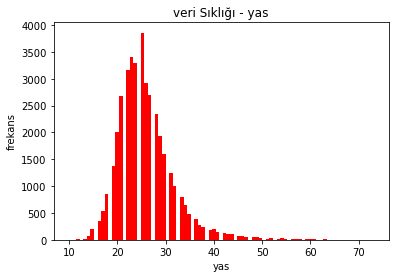

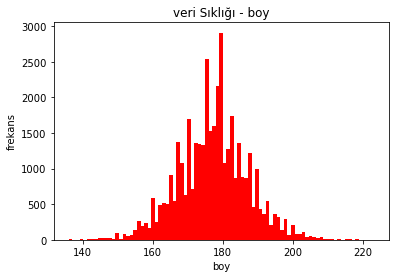

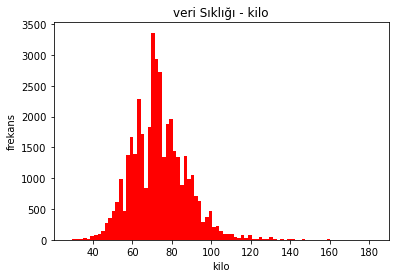

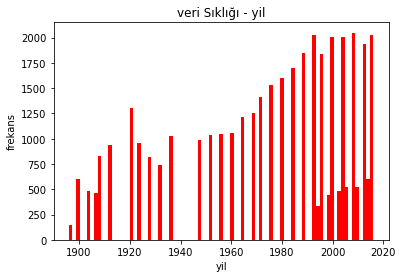

In [21]:
# tüm sayısal degiskenler icin histogramları cizdirelim

sayisal_degisken = ["yas","boy","kilo","yil"]

for i in sayisal_degisken:
    plotHistogram(i)

* Beklenildiği gibi yaş, kilo ve boy sütunlarında normal dağılıma yakın bir dağılım söz konusu
* Yıl sütununda ise ilk olarak göze çarpan son yüzyılda gerçekleşen savaş zamanlarında olimpiyatların yapılmadığı ve son 20 yılda yılda olimpiyatların eski yıllara göre daha çok yapıldığıdır. (Aslında bu çıkarım dogru olmayabilir. Frekansın artmasının tek koşulu daha cok yapılmak degildir belki yeni yeni sporlar eklendi ya da o yıllar daha cok sporcu katıldı diye yorumlayabiliiriz.)

In [22]:
veri.describe() #sayisal verilerin istatistiksel bilgilerini verir

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


**Kutu grafiği**

In [23]:
#sayisal veriler icin boxplot cizdirelim 
def boxPlot(degisken): 

    plt.boxplot(veri[degisken])
    plt.title(f"{degisken} değişkeni için Kutu Grafiği")
    plt.xlabel(degisken)
    plt.ylabel("Değer")
    plt.show()

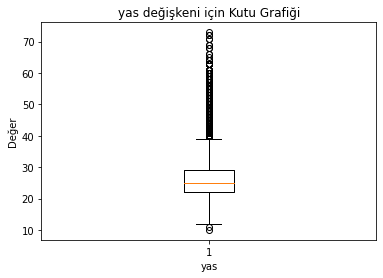

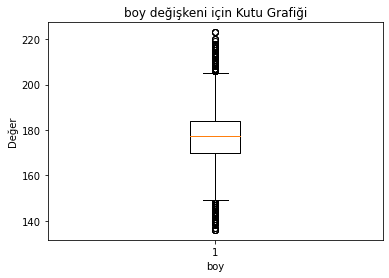

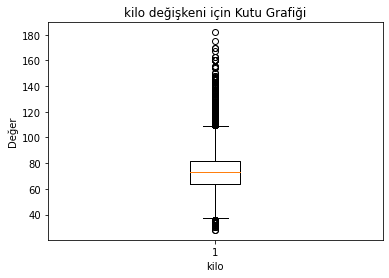

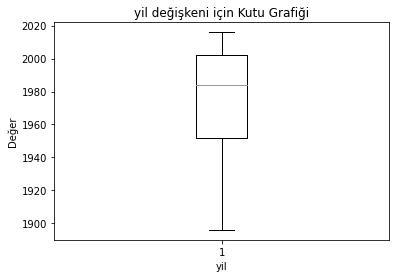

In [24]:
for i in sayisal_degisken:
    boxPlot(i)

In [25]:
#not  #ciktisinin türü series olur 
veri.yas

3         34.0
37        30.0
38        30.0
40        28.0
41        28.0
          ... 
271078    25.0
271080    33.0
271082    28.0
271102    19.0
271103    23.0
Name: yas, Length: 39783, dtype: float64

In [26]:
veri['yas'] #aynı sey ama burada iceriye degisken de verebiliyoruz

3         34.0
37        30.0
38        30.0
40        28.0
41        28.0
          ... 
271078    25.0
271080    33.0
271082    28.0
271102    19.0
271103    23.0
Name: yas, Length: 39783, dtype: float64

## Kategorik Değişkenler 
* Kategorik değişkenleri incelemek ve yorumlamak için bar grafiklerini kullanacağız. 

In [27]:
#öncelikle çubuk grafiğini çizdirecegimiz metodu yazalım
def plotBar(degisken, n=5):
    """
        Girdi: Değişken/sütun ismi
        n = Gösterilecek en çok rastlanan eşsiz değer sayisi
        Çıktı: Çubuk grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "blue")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation =45) 
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı - {degisken}")
    plt.show()
    print(f"{degisken}:\n{veri_sayma}")

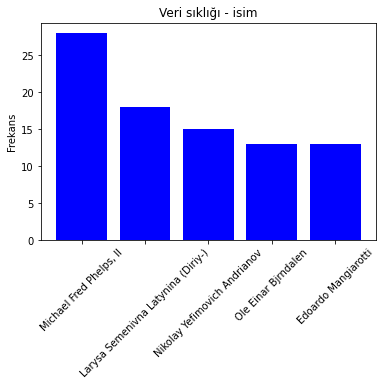

isim:
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


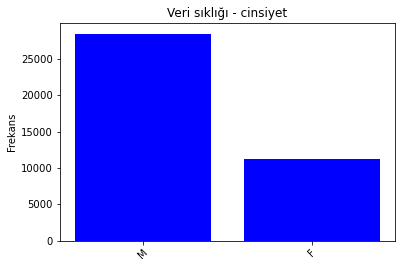

cinsiyet:
M    28530
F    11253
Name: cinsiyet, dtype: int64


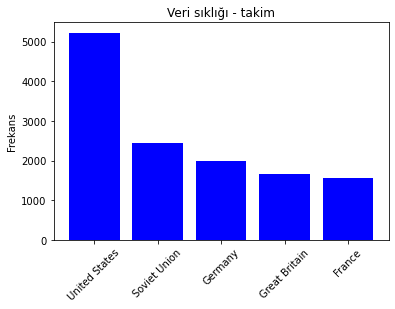

takim:
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


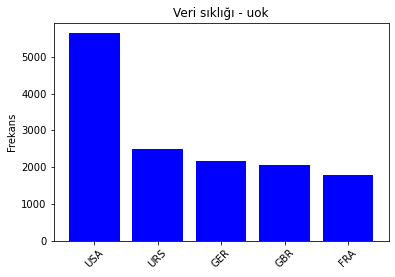

uok:
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


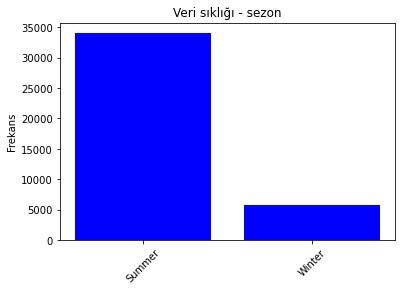

sezon:
Summer    34088
Winter     5695
Name: sezon, dtype: int64


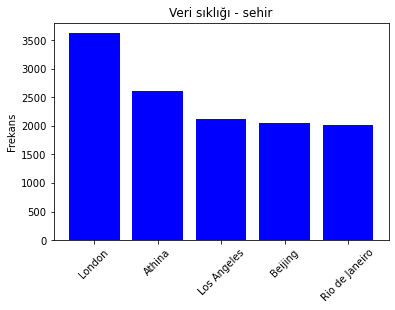

sehir:
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


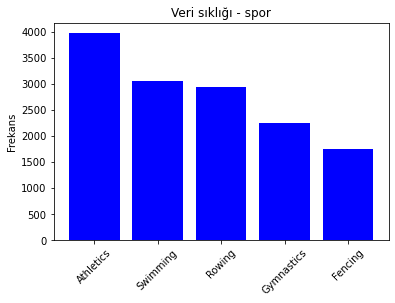

spor:
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


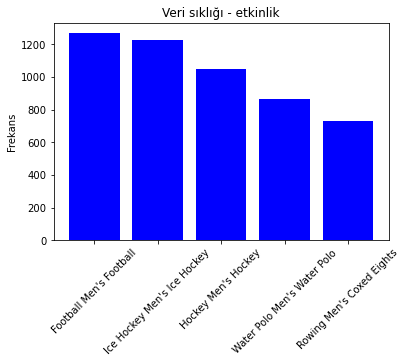

etkinlik:
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


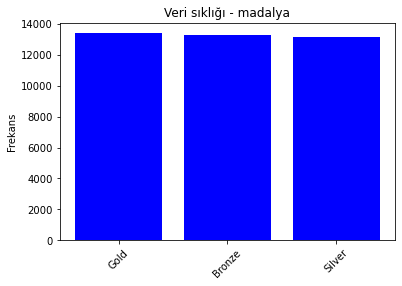

madalya:
Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [28]:
kategorik_degisken = ["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]

for i in kategorik_degisken:
    plotBar(i)

# İki Değişkenli Veri Analizi
* İki değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar arasında bulunan ilişkileri inceleyeceğiz
    1. Cinsiyete göre boy ve kilo karşılaştırması
    2. Sayısal sütunlar arasındaki ilişkinin incelenmesi
    3. Madalya ve yaş arasındaki ilişkinin incelenmesi
    4. Takımların kazandıkları altın, gümüş ve bronz madalya sayıları
    5. Kazanılan madalyaların hangi şehirlerde kazanıldığı
    6. Cinsiyete göre kazanılan altın, gümüş ve bronz madalya sayıları

## Cinsiyete göre Boy ve Ağırlık Karşılaştırması

In [29]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [31]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


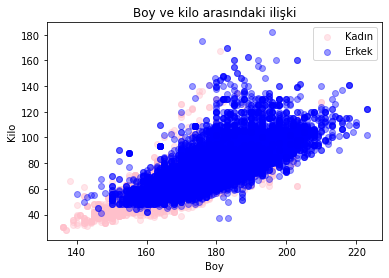

In [39]:
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4,label ="Kadın",color = "pink") #alpha transparanlık sağlar
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4,label ="Erkek", color ="blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve kilo arasındaki ilişki")
plt.legend() #renklerin karşılığını sag üstte gösterir
plt.show()

boy kilo arasında genelde pozitif bi ilinti var

## Sayısal Sütunlar Arasında İlişki İncelenmesi

In [40]:
veri.loc[:,["yas","boy","kilo"]].corr() #korelasyon tablosu oluşturacak

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


yas ve boy arasındaki baglantı az cıktı neden? cünkü zaten hepsi eriskin
yasın artmasıyla boyun uzaması arasında bir ilinti olamaz bu yüzden ama boy ve kilo arasındaki korelasyon mantıklı olarak iyi bir ilişki çıktı

## Madalya ve Yaş Arasındaki İlişki

In [42]:
#sporcuları altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya'])
veri_gecici.head() #get dummies ordinal kategorik degiskendi 
#get dummies her kategoriyi sayisala cevirdi
#ilerde ml modellerine gecmeden once bunu kullanacagiz

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [44]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


0'a yakın yani madalya almakla yaş arasında bir ilinti bulunamadı

## Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [46]:
veri_gecici.loc[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

KeyError: "None of [Index(['takim', 'madalya_Bronze', 'madalya_Gold', 'madalya_Silver'], dtype='object')] are in the [index]"

loc gereksiz oldu o yüzden hata aldık 

In [47]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0



şimdi tek tek, bir satırda yaptığımız bu işlemi inceleyelim

In [50]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]]


,takim,madalya_Bronze,madalya_Gold,madalya_Silver
3,Denmark/Sweden,0,1,0
37,Finland,1,0,0
38,Finland,1,0,0
40,Finland,1,0,0
41,Finland,1,0,0
...,...,...,...,...
271078,Soviet Union,0,0,1
271080,Soviet Union,1,0,0
271082,Poland,1,0,0
271102,Russia,1,0,0


In [55]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index = False)

In [56]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"], as_index = False).sum()

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
0,A North American Team,4.0,0.0,0.0
1,Afghanistan,2.0,0.0,0.0
2,Algeria,8.0,5.0,4.0
3,Ali-Baba II,5.0,0.0,0.0
4,Amateur Athletic Association,0.0,5.0,0.0
...,...,...,...,...
493,Winnipeg Shamrocks-1,0.0,12.0,0.0
494,Yugoslavia,93.0,130.0,167.0
495,Zambia,1.0,0.0,1.0
496,Zimbabwe,1.0,17.0,4.0


veri setinde şöyle bir durum var. almanya doğu almanya batı almanya gibi dağılan birleşen ülkeler oluyor bunun gibi bir veri bilimcisinin karşılaştığı cari durumlar olabilir. bununla baş edebilmek gerekli ama biz şimdi onunla uğraşamayacağız.

## Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [58]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


## Cinsiyete Göre Kazanılan Altın, Gümüş ve Bronz Madalya Sayıları

In [59]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


# Çok Değişkenli Veri Analizi

## Pivot Tablosu 
* Pivot tablo, veritabanı, iş zekası programı ya da veri tablosu gibi, daha geniş bir tabloyu özetleyen istatistik tablosudur. Bu özet, pivot tabloyu anlamlı bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [63]:
veri_pivot = veri.pivot_table(index = "madalya", columns = "cinsiyet",
                             values=["boy","kilo","yas"],
                             aggfunc = {"boy":np.mean,"kilo":np.mean,"yas":[min,max, np.std]})

veri_pivot.head()
#index = madalya ile madalyaya göre ayrıstırma yaptık
#columns = cinsiyet ile kadın erkek seklinde ayrıstırdık

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

std +- 5 dolasıyor

# Anomali Tespiti
* Aykırı değer, diğer gözlelerden önemli ölçüde farklı veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; ikincisi bazen veri kümesinden çıkarılır bir aykırı değer istatistiksel analizlerde ciddi sorunlara neden olabilir.

* 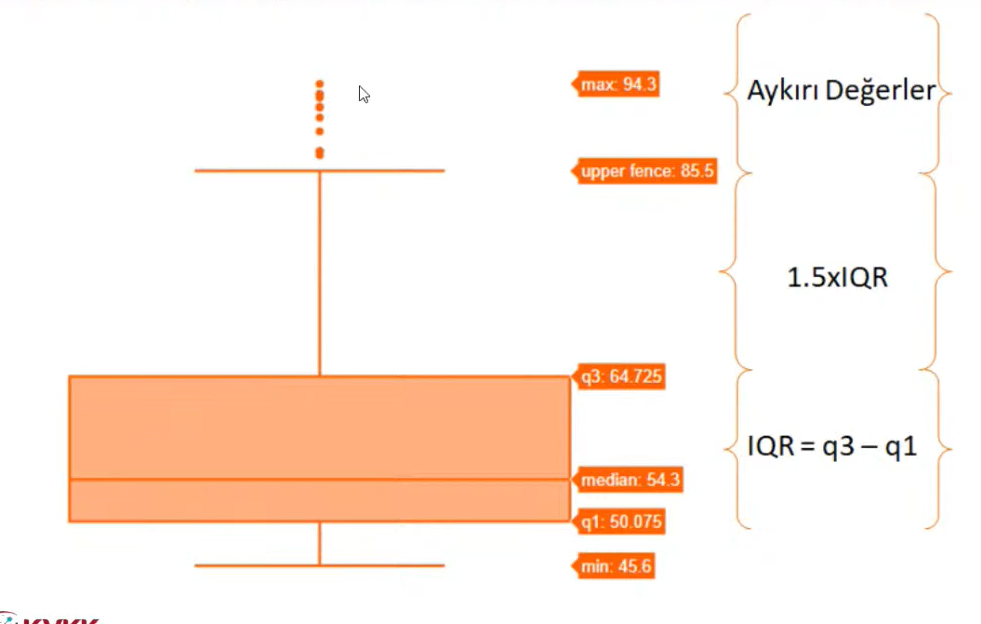

In [77]:
#min kütüphane kullanarak yapalım 

def anomaliTespiti(df, ozellik):
    outlier_indices = []
    for c in ozellik:
        #1. çeyrek
        Q1 = np.percentile(df[c],25) 
        #3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR Inter Quartile Range
        IQR = Q3 - Q1 
        # aykırı değer için ek adım miktarı 
        outlier_step = 1.5 * IQR
        #aykırı değeri ve de bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c]<Q1- outlier_step) | (df[c]>Q3 + outlier_step)].index
        #tespit edilen indeksleri depolayalım
        outlier_indices.extend(outlier_list_col)
    
    #eşsiz aykırı değerleri bulalım
    outlier_indices = Counter(outlier_indices) #counter'ı import etmiştik
    #bir satır birden cok nitelik icin aykırı olabilir
    #bunları ayıklayalım
    #bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim 
    #v 1 ise 1 nitelik icin bu satırı aykırı kabul et gibi,
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    return multiple_outliers

In [78]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts() #anomali tespit edildi her sporda kacar adet bunu görecegiz

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Diving             3
Sailing            3
Wrestling          1
Shooting           1
Figure Skating     1
Name: spor, dtype: int64

tahmin edildigi üzere basketbolda cok cıktı cünkü agırlık boy fazla

* anomalinin en çok görüldüğü spor branşları yukarıdadır

**Bunları da görselleştirelim**

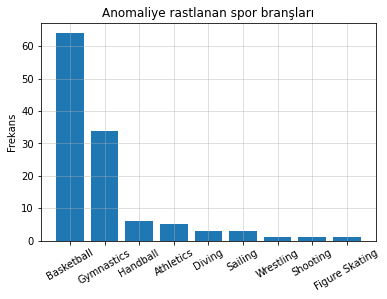

In [81]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index, veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye rastlanan spor branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha = 0.5) #grid ızgara olusturur alpha saydamlık verir
plt.show()

In [84]:
veri_gym= veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


gordugumuz gibi kilolar boylar yaslar anomali

In [85]:

veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

anomaliye sebep olanların hepsi kadın gymnastics sporcularmı

In [86]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


aynı sporcuları elemedik bu arada bu analizde yanılgıya neden olabilir


In [97]:
veri_basketbol["isim"].unique()

array(['Franjo Arapovi', 'Oleksandr Mykhailovych Bielostienniy',
       'Carlos Austin Boozer, Jr.', 'Roberto Chiacig',
       'DeMarcus Amir Cousins', 'Vlade Divac', 'Gintaras Einikis',
       'Marc Gasol Sez', 'Pau Gasol Sez', 'Romn Javier Gonzlez',
       'Guillermo Gustavo "Willy" Hernangmez Geuer',
       'Valeriy Hryhorovych Hoborov', 'Dwight David Howard',
       'Nikola Joki', 'Hyland DeAndre Jordan, Jr.',
       'Aleksandr Olegovich Kaun', 'Joseph William "Joe" Kleine',
       'Jon Francis Koncak', 'Serhiy Ivanovych Kovalenko', 'Jnis Krmi',
       'Kevin Wesley Love', 'Denis Marconato', 'Alonzo Harding Mourning',
       'Timofey Pavlovich Mozgov', 'Fabricio Ral Jess Oberto',
       'Hakeem Abdul Olajuwon', "Shaquille Rashuan O'Neal",
       'Viktor Aleksandrovich Pankrashkin', 'Miroslav Raduljica',
       'eljko "Zelly" Rebraa', 'Fernando Romay Pereiro',
       'Arvydas Romas Sabonis', 'Zoran Savi', 'Ujana Semjonova',
       'Vladimir timac', 'an Tabak', 'Volodymyr Petrovych T

In [99]:
veri_basketbol.groupby('isim').isim.count()

isim
Aleksandr Olegovich Kaun                      1
Alonzo Harding Mourning                       1
Arvydas Romas Sabonis                         3
Carlos Austin Boozer, Jr.                     2
DeMarcus Amir Cousins                         1
Denis Marconato                               1
Dwight David Howard                           1
Eurelijus ukauskas                            2
Fabricio Ral Jess Oberto                      2
Fernando Romay Pereiro                        1
Franjo Arapovi                                2
Frdric Jean Santo Weis                        1
Gintaras Einikis                              3
Guillermo Gustavo "Willy" Hernangmez Geuer    1
Hakeem Abdul Olajuwon                         1
Hyland DeAndre Jordan, Jr.                    1
Jnis Krmi                                     3
Jon Francis Koncak                            1
Joseph William "Joe" Kleine                   1
Kevin Wesley Love                             1
Marc Gasol Sez                     

In [102]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

* Basketbol oynayan erkek oyuncuların boylarının uzun ve kilolarının fazla olmasından kaynaklı anomali tespit edilmiştir.

# Zaman Serilerinde Veri Analizi
* Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi
* Yıllara Göre Madalya Sayıları

In [103]:
veri_zaman = veri.copy()

In [105]:
#olimpiyatların gerçekleştiği eşsiz yılları bulalım
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [108]:
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

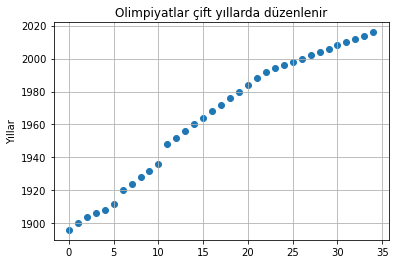

In [110]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar çift yıllarda düzenlenir")
plt.show()

2 bosluk olimpiyarların o arada yapılamadıgını gösterdi

**veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim**

In [113]:
tarih_saat_nesnesi = pd.to_datetime(veri_zaman.yil,format = "%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head()

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
40   2014-01-01
41   1948-01-01
Name: yil, dtype: datetime64[ns]

In [114]:
#veri zaman icerisine yeni bir sütun acalim
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,2014-01-01
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1948-01-01


pandas'ta index'i datetime veri tipinde olan df'ler icin özel fonksiyonlar var bunları kullanabilmek icin indeximizi degistirecegiz


In [115]:
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1, inplace = True) #artik yil sütününa gerek yok

In [116]:
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


## Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [117]:
periyodik_veri = veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde ortalama değerleri alır
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [118]:
#kayıp verileri çıkaralım 
periyodik_veri.dropna(axis=0, inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

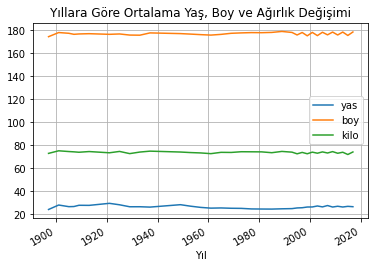

In [119]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Boy ve Ağırlık Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

anormal degisim yok 

yukarda son zamanlardaki zigzag kıs olimpiyatlarda daha kısa boylu sporcuların madalya kazanmasından dolayı

## Yıllara Göre Madalya Sayıları

In [120]:
veri_zaman = pd.get_dummies(veri_zaman, columns = ["madalya"])
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [122]:
periyodik_veri = veri_zaman.resample("2A").sum()
#kayıp verileri çıkaralım 
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


In [123]:
periyodik_veri.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

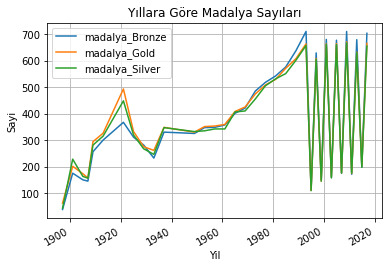

In [124]:
plt.figure()
periyodik_veri.loc[:,['madalya_Bronze','madalya_Gold','madalya_Silver']].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("Sayi")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

## Yıllara ve Sezonlara Göre Madalya Sayilari

In [125]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,0,0,1
1994-01-01,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,1,0,0


In [126]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [127]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

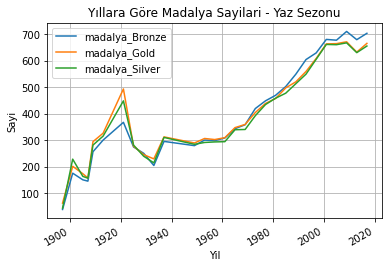

In [129]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot() #zaman serisi olduğu için plot kullanacagız?
plt.title("Yıllara Göre Madalya Sayilari - Yaz Sezonu")
plt.ylabel("Sayi")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

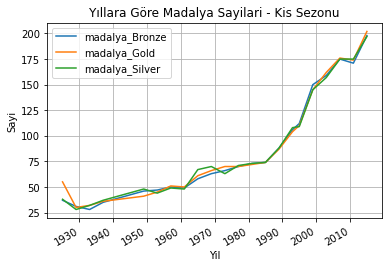

In [130]:
plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot() #zaman serisi olduğu için plot kullanacagız?
plt.title("Yıllara Göre Madalya Sayilari - Kis Sezonu")
plt.ylabel("Sayi")
plt.xlabel("Yil")
plt.grid(True)
plt.show()